<a href="https://colab.research.google.com/github/jimena-mr/EDA-tennis/blob/main/EDA_tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_players = pd.read_csv('/content/drive/MyDrive/Desarrollo de Producto de Datos/EDA/atp_players.csv')
df_players.head(5)

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [ ]:
df_players = df_players.drop(['wikidata_id'],axis=1)
df_players

,player_id,name_first,name_last,hand,dob,ioc,height
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0
...,...,...,...,...,...,...,...
61150,212460,Yan Cheng,Chen,U,NaN,TWN,NaN
61151,212461,Daniele,Rapagnetta,U,20061203.0,ITA,NaN
61152,212462,Evan,Burnett,U,20050425.0,USA,NaN
61153,212463,Josue,Guzman,U,20050406.0,PER,NaN


In [ ]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61155 entries, 0 to 61154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player_id   61155 non-null  int64  
 1   name_first  60551 non-null  object 
 2   name_last   61114 non-null  object 
 3   hand        61144 non-null  object 
 4   dob         46049 non-null  float64
 5   ioc         60976 non-null  object 
 6   height      2791 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
df_players[df_players['name_last'] == 'Djokovic'] # id Novak: 104925

,player_id,name_first,name_last,hand,dob,ioc,height
4919,104925,Novak,Djokovic,R,19870522.0,SRB,188.0
5816,105831,Marko,Djokovic,R,19910820.0,SRB,NaN
10448,110463,Djordje,Djokovic,R,19950717.0,SRB,NaN


In [ ]:
df_players[df_players['name_last'] == 'Federer']

,player_id,name_first,name_last,hand,dob,ioc,height
3818,103819,Roger,Federer,R,19810808.0,SUI,185.0


In [ ]:
df_players[df_players['name_last'] == 'Nadal'] # id Rafa: 104745

,player_id,name_first,name_last,hand,dob,ioc,height
4741,104745,Rafael,Nadal,L,19860603.0,ESP,185.0
35136,135152,Jorge,Nadal,U,19920811.0,ESP,NaN


<Axes: xlabel='hand', ylabel='count'>

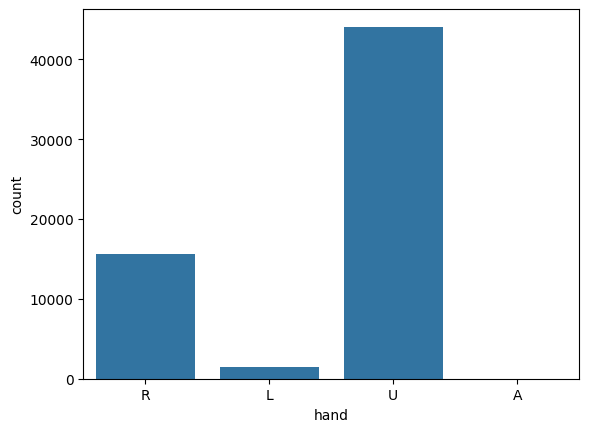

In [ ]:
sns.countplot(df_players, x = 'hand') # prueba

In [ ]:
# leer dataframe de partidos -> atp_matches from 2000 a 2020
# hacer merge en un solo dataframe

import os

folder_path = '/content/drive/MyDrive/Desarrollo de Producto de Datos/EDA/matches'  # Ruta de la carpeta que contiene los datasets
files = os.listdir(folder_path)


In [ ]:
import pandas as pd

dfs = []

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
merged_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2012-339,Brisbane,Hard,32,A,20120101,1,104918,1.0,NaN,...,41.0,29.0,15.0,14.0,4.0,9.0,4.0,7380.0,91.0,598.0
1,2012-339,Brisbane,Hard,32,A,20120101,2,104180,NaN,NaN,...,67.0,54.0,20.0,16.0,1.0,2.0,54.0,893.0,85.0,630.0
2,2012-339,Brisbane,Hard,32,A,20120101,3,104571,NaN,NaN,...,48.0,36.0,17.0,11.0,2.0,4.0,44.0,940.0,79.0,658.0
3,2012-339,Brisbane,Hard,32,A,20120101,4,105453,5.0,NaN,...,49.0,27.0,23.0,13.0,9.0,14.0,25.0,1430.0,81.0,652.0
4,2012-339,Brisbane,Hard,32,A,20120101,5,104797,NaN,NaN,...,38.0,28.0,11.0,9.0,0.0,0.0,73.0,685.0,23.0,1630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63189,2011-605,Tour Finals,Hard,16,F,20111120,14,104607,NaN,NaN,...,36.0,22.0,26.0,14.0,3.0,8.0,7.0,3300.0,5.0,4480.0
63190,2011-605,Tour Finals,Hard,16,F,20111120,15,104607,NaN,NaN,...,37.0,32.0,27.0,14.0,4.0,5.0,7.0,3300.0,9.0,2395.0
63191,2011-D044,Davis Cup WG F: ESP vs ARG,Clay,4,D,20111202,1,104745,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9575.0,26.0,1335.0
63192,2011-D044,Davis Cup WG F: ESP vs ARG,Clay,4,D,20111202,2,103970,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4880.0,11.0,2315.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63194 entries, 0 to 63193
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          63194 non-null  object 
 1   tourney_name        63194 non-null  object 
 2   surface             63194 non-null  object 
 3   draw_size           63194 non-null  int64  
 4   tourney_level       63194 non-null  object 
 5   tourney_date        63194 non-null  int64  
 6   match_num           63194 non-null  int64  
 7   winner_id           63194 non-null  int64  
 8   winner_seed         26191 non-null  float64
 9   winner_entry        7711 non-null   object 
 10  winner_name         63194 non-null  object 
 11  winner_hand         63187 non-null  object 
 12  winner_ht           61773 non-null  float64
 13  winner_ioc          63194 non-null  object 
 14  winner_age          63191 non-null  float64
 15  loser_id            63194 non-null  int64  
 16  lose

In [ ]:
novak_df = merged_df[(merged_df['winner_id'] == 104925) | (merged_df['loser_id'] == 104925)] # Novak
novak_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
143,2012-580,Australian Open,Hard,128,G,20120116,1,104925,1.0,NaN,...,32.0,18.0,2.0,10.0,4.0,13.0,1.0,13630.0,109.0,521.0
207,2012-580,Australian Open,Hard,128,G,20120116,65,104925,1.0,NaN,...,38.0,24.0,11.0,12.0,6.0,13.0,1.0,13630.0,56.0,845.0
239,2012-580,Australian Open,Hard,128,G,20120116,97,104925,1.0,NaN,...,43.0,21.0,5.0,10.0,6.0,14.0,1.0,13630.0,81.0,653.0
255,2012-580,Australian Open,Hard,128,G,20120116,113,104925,1.0,NaN,...,66.0,45.0,21.0,17.0,4.0,12.0,1.0,13630.0,181.0,265.0
263,2012-580,Australian Open,Hard,128,G,20120116,121,104925,1.0,NaN,...,64.0,39.0,17.0,14.0,7.0,12.0,1.0,13630.0,5.0,4925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63130,2011-352,Paris Masters,Hard,48,M,20111107,2,104925,1.0,NaN,...,41.0,28.0,12.0,13.0,5.0,11.0,1.0,13785.0,19.0,1730.0
63131,2011-352,Paris Masters,Hard,48,M,20111107,3,104542,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2935.0,1.0,13785.0
63185,2011-605,Tour Finals,Hard,16,F,20111120,10,104925,NaN,NaN,...,45.0,34.0,25.0,15.0,5.0,8.0,1.0,13475.0,7.0,3300.0
63186,2011-605,Tour Finals,Hard,16,F,20111120,11,103970,NaN,NaN,...,32.0,21.0,9.0,8.0,3.0,7.0,5.0,4480.0,1.0,13475.0


In [ ]:
federer_df = merged_df[(merged_df['winner_id'] == 103819) | (merged_df['loser_id'] == 103819)] # Federer
federer_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
73,2012-451,Doha,Hard,32,A,20120102,16,103819,2.0,NaN,...,33.0,19.0,3.0,8.0,3.0,7.0,3.0,8170.0,41.0,980.0
81,2012-451,Doha,Hard,32,A,20120102,24,103819,2.0,NaN,...,26.0,19.0,9.0,8.0,3.0,6.0,3.0,8170.0,116.0,491.0
85,2012-451,Doha,Hard,32,A,20120102,28,103819,2.0,NaN,...,47.0,31.0,16.0,15.0,4.0,9.0,3.0,8170.0,38.0,1015.0
87,2012-451,Doha,Hard,32,A,20120102,30,104542,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,4335.0,3.0,8170.0
190,2012-580,Australian Open,Hard,128,G,20120116,48,103819,3.0,NaN,...,36.0,23.0,22.0,14.0,7.0,13.0,3.0,8010.0,172.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63177,2011-605,Tour Finals,Hard,16,F,20111120,2,103819,NaN,NaN,...,30.0,14.0,5.0,7.0,2.0,6.0,4.0,6670.0,2.0,9375.0
63180,2011-605,Tour Finals,Hard,16,F,20111120,5,103819,NaN,NaN,...,47.0,32.0,16.0,12.0,6.0,10.0,4.0,6670.0,8.0,2965.0
63181,2011-605,Tour Finals,Hard,16,F,20111120,6,103819,NaN,NaN,...,33.0,25.0,17.0,13.0,2.0,5.0,4.0,6670.0,6.0,3535.0
63182,2011-605,Tour Finals,Hard,16,F,20111120,7,103819,NaN,NaN,...,39.0,25.0,18.0,11.0,5.0,8.0,4.0,6670.0,5.0,4480.0


In [ ]:
nadal_df = merged_df[(merged_df['winner_id'] == 104745) | (merged_df['loser_id'] == 104745)] # Nadal
nadal_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
58,2012-451,Doha,Hard,32,A,20120102,1,104745,1.0,NaN,...,64.0,41.0,18.0,14.0,8.0,12.0,2.0,9595.0,43.0,960.0
74,2012-451,Doha,Hard,32,A,20120102,17,104745,1.0,NaN,...,50.0,29.0,12.0,8.0,11.0,15.0,2.0,9595.0,189.0,262.0
82,2012-451,Doha,Hard,32,A,20120102,25,104745,1.0,NaN,...,42.0,25.0,7.0,10.0,3.0,6.0,2.0,9595.0,35.0,1105.0
86,2012-451,Doha,Hard,32,A,20120102,29,104792,4.0,NaN,...,36.0,23.0,6.0,9.0,0.0,3.0,16.0,1910.0,2.0,9595.0
206,2012-580,Australian Open,Hard,128,G,20120116,64,104745,2.0,NaN,...,49.0,24.0,12.0,12.0,4.0,10.0,2.0,9595.0,167.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63176,2011-605,Tour Finals,Hard,16,F,20111120,1,104745,NaN,NaN,...,56.0,38.0,19.0,15.0,5.0,9.0,2.0,9375.0,8.0,2965.0
63177,2011-605,Tour Finals,Hard,16,F,20111120,2,103819,NaN,NaN,...,30.0,14.0,5.0,7.0,2.0,6.0,4.0,6670.0,2.0,9375.0
63178,2011-605,Tour Finals,Hard,16,F,20111120,3,104542,NaN,NaN,...,63.0,44.0,16.0,16.0,3.0,6.0,6.0,3535.0,2.0,9375.0
63191,2011-D044,Davis Cup WG F: ESP vs ARG,Clay,4,D,20111202,1,104745,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9575.0,26.0,1335.0


# Dataframe de partidos del Big Three (2000-2020)

In [ ]:
big_three_matches = pd.concat([novak_df,federer_df,nadal_df], ignore_index=True)
big_three_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2012-580,Australian Open,Hard,128,G,20120116,1,104925,1.0,NaN,...,32.0,18.0,2.0,10.0,4.0,13.0,1.0,13630.0,109.0,521.0
1,2012-580,Australian Open,Hard,128,G,20120116,65,104925,1.0,NaN,...,38.0,24.0,11.0,12.0,6.0,13.0,1.0,13630.0,56.0,845.0
2,2012-580,Australian Open,Hard,128,G,20120116,97,104925,1.0,NaN,...,43.0,21.0,5.0,10.0,6.0,14.0,1.0,13630.0,81.0,653.0
3,2012-580,Australian Open,Hard,128,G,20120116,113,104925,1.0,NaN,...,66.0,45.0,21.0,17.0,4.0,12.0,1.0,13630.0,181.0,265.0
4,2012-580,Australian Open,Hard,128,G,20120116,121,104925,1.0,NaN,...,64.0,39.0,17.0,14.0,7.0,12.0,1.0,13630.0,5.0,4925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,2011-605,Tour Finals,Hard,16,F,20111120,1,104745,NaN,NaN,...,56.0,38.0,19.0,15.0,5.0,9.0,2.0,9375.0,8.0,2965.0
3855,2011-605,Tour Finals,Hard,16,F,20111120,2,103819,NaN,NaN,...,30.0,14.0,5.0,7.0,2.0,6.0,4.0,6670.0,2.0,9375.0
3856,2011-605,Tour Finals,Hard,16,F,20111120,3,104542,NaN,NaN,...,63.0,44.0,16.0,16.0,3.0,6.0,6.0,3535.0,2.0,9375.0
3857,2011-D044,Davis Cup WG F: ESP vs ARG,Clay,4,D,20111202,1,104745,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9575.0,26.0,1335.0


# Data Wrangling

In [ ]:
big_three_matches = big_three_matches.sort_values(by='tourney_id') # ordenando de mas antiguo a mas reciente
big_three_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
1460,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
1461,2000-306,St. Poelten,Clay,32,A,20000522,4,103082,NaN,NaN,...,36.0,19.0,10.0,8.0,6.0,11.0,94.0,428.0,54.0,735.0
1462,2000-314,Gstaad,Clay,32,A,20000710,1,102374,1.0,NaN,...,63.0,43.0,26.0,15.0,7.0,10.0,10.0,1860.0,39.0,911.0
1465,2000-328,Basel,Carpet,32,A,20001023,25,103819,NaN,NaN,...,36.0,26.0,18.0,10.0,3.0,5.0,34.0,1018.0,185.0,209.0
1467,2000-328,Basel,Carpet,32,A,20001023,31,102358,2.0,NaN,...,77.0,58.0,31.0,22.0,5.0,10.0,6.0,2693.0,34.0,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2020-M024,Cincinnati Masters,Hard,64,M,20200824,299,104925,1.0,NaN,...,73.0,44.0,15.0,16.0,8.0,14.0,1.0,10220.0,12.0,2360.0
353,2020-M024,Cincinnati Masters,Hard,64,M,20200824,293,104925,1.0,NaN,...,42.0,32.0,10.0,9.0,6.0,9.0,1.0,10220.0,55.0,923.0
354,2020-M024,Cincinnati Masters,Hard,64,M,20200824,285,104925,1.0,NaN,...,40.0,25.0,12.0,11.0,3.0,7.0,1.0,10220.0,72.0,739.0
350,2020-M024,Cincinnati Masters,Hard,64,M,20200824,300,104925,1.0,NaN,...,46.0,35.0,10.0,13.0,2.0,5.0,1.0,10220.0,30.0,1350.0


In [ ]:
big_three_matches.shape

(3859, 49)

In [ ]:
big_three_matches['tourney_level'].unique()

array(['A', 'M', 'G', 'D', 'F'], dtype=object)

 A: Torneos ATP 250, 500 \\
 M: Masters 1000 \\
 G: Grand Slam \\
 D: Davis Cup \\
 F: ATP Finals

In [ ]:
columnas_a_eliminar = [
    'winner_rank_points','loser_rank_points', 'match_num','winner_entry','loser_entry','winner_id','loser_id','winner_seed',
    'loser_seed','loser_ht','winner_ht','draw_size','minutes']

big_three_matches = big_three_matches.drop(columnas_a_eliminar, axis=1)

In [ ]:
big_three_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3859 entries, 1460 to 352
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_id     3859 non-null   object 
 1   tourney_name   3859 non-null   object 
 2   surface        3859 non-null   object 
 3   tourney_level  3859 non-null   object 
 4   tourney_date   3859 non-null   int64  
 5   winner_name    3859 non-null   object 
 6   winner_hand    3859 non-null   object 
 7   winner_ioc     3859 non-null   object 
 8   winner_age     3859 non-null   float64
 9   loser_name     3859 non-null   object 
 10  loser_hand     3859 non-null   object 
 11  loser_ioc      3859 non-null   object 
 12  loser_age      3859 non-null   float64
 13  score          3859 non-null   object 
 14  best_of        3859 non-null   int64  
 15  round          3859 non-null   object 
 16  w_ace          3683 non-null   float64
 17  w_df           3683 non-null   float64
 18  w_svpt     

In [ ]:
# Imputacion de los valores faltantes con la media de cada columna
num_cols = big_three_matches.select_dtypes(include=['number'])

big_three_matches[num_cols.columns] = num_cols.fillna(num_cols.mean())

In [ ]:
big_three_matches['best_of'] = big_three_matches['best_of'].astype(int)
cols_float = ['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
                        'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced','loser_rank','winner_rank','winner_age','loser_age']

big_three_matches[cols_float] = big_three_matches[cols_float].astype(int)

In [ ]:
# Columna agregada 'year'
big_three_matches['year'] = big_three_matches['tourney_id'].str.split('-').str[0]
big_three_matches['year'] = big_three_matches['year'].astype(int)

big_three_matches.head(5)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ioc,winner_age,loser_name,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
1460,2000-301,Auckland,Hard,A,20000110,Juan Carlos Ferrero,R,ESP,19,Roger Federer,...,70,43,29,14,10,6,8,45,61,2000
1461,2000-306,St. Poelten,Clay,A,20000522,Markus Hantschk,R,GER,22,Roger Federer,...,64,36,19,10,8,6,11,94,54,2000
1462,2000-314,Gstaad,Clay,A,20000710,Alex Corretja,R,ESP,26,Roger Federer,...,116,63,43,26,15,7,10,10,39,2000
1465,2000-328,Basel,Carpet,A,20001023,Roger Federer,R,SUI,19,Nicolas Thomann,...,68,36,26,18,10,3,5,34,185,2000
1467,2000-328,Basel,Carpet,A,20001023,Thomas Enqvist,R,SWE,26,Roger Federer,...,137,77,58,31,22,5,10,6,34,2000


In [ ]:
big_three_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3859 entries, 1460 to 352
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tourney_id     3859 non-null   object
 1   tourney_name   3859 non-null   object
 2   surface        3859 non-null   object
 3   tourney_level  3859 non-null   object
 4   tourney_date   3859 non-null   int64 
 5   winner_name    3859 non-null   object
 6   winner_hand    3859 non-null   object
 7   winner_ioc     3859 non-null   object
 8   winner_age     3859 non-null   int64 
 9   loser_name     3859 non-null   object
 10  loser_hand     3859 non-null   object
 11  loser_ioc      3859 non-null   object
 12  loser_age      3859 non-null   int64 
 13  score          3859 non-null   object
 14  best_of        3859 non-null   int64 
 15  round          3859 non-null   object
 16  w_ace          3859 non-null   int64 
 17  w_df           3859 non-null   int64 
 18  w_svpt         3859 non-null   

In [ ]:
big_three_matches['round'].unique()

array(['R32', 'QF', 'F', 'SF', 'R16', 'R64', 'R128', 'BR', 'RR'],
      dtype=object)

In [ ]:
big_three_matches.head(10)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ioc,winner_age,loser_name,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
1460,2000-301,Auckland,Hard,A,20000110,Juan Carlos Ferrero,R,ESP,19,Roger Federer,...,70,43,29,14,10,6,8,45,61,2000
1461,2000-306,St. Poelten,Clay,A,20000522,Markus Hantschk,R,GER,22,Roger Federer,...,64,36,19,10,8,6,11,94,54,2000
1462,2000-314,Gstaad,Clay,A,20000710,Alex Corretja,R,ESP,26,Roger Federer,...,116,63,43,26,15,7,10,10,39,2000
1465,2000-328,Basel,Carpet,A,20001023,Roger Federer,R,SUI,19,Nicolas Thomann,...,68,36,26,18,10,3,5,34,185,2000
1467,2000-328,Basel,Carpet,A,20001023,Thomas Enqvist,R,SWE,26,Roger Federer,...,137,77,58,31,22,5,10,6,34,2000
1466,2000-328,Basel,Carpet,A,20001023,Roger Federer,R,SUI,19,Lleyton Hewitt,...,107,55,37,31,17,6,10,34,9,2000
1464,2000-328,Basel,Carpet,A,20001023,Roger Federer,R,SUI,19,Andrei Pavel,...,65,40,29,16,11,0,1,34,27,2000
1463,2000-328,Basel,Carpet,A,20001023,Roger Federer,R,SUI,19,Tommy Haas,...,67,37,25,11,9,3,6,34,20,2000
1471,2000-337,Vienna,Hard,A,20001009,Tim Henman,R,GBR,26,Roger Federer,...,78,50,35,22,14,2,4,10,31,2000
1470,2000-337,Vienna,Hard,A,20001009,Roger Federer,R,SUI,19,Richard Krajicek,...,50,33,23,11,9,1,3,31,20,2000


In [ ]:
big_three_matches.shape

(3859, 37)

In [ ]:
carpet_tourneys = big_three_matches[big_three_matches['surface']=='Carpet']
carpet_tourneys['tourney_name'].unique()

array(['Basel', 'Paris Masters', 'Lyon', 'Davis Cup WG PO: SUI vs BLR',
       'Davis Cup WG R1: SUI vs AUS', 'Milan', 'Moscow',
       'Davis Cup WG QF: SUI vs FRA', 'Davis Cup WG R1: NED vs SUI',
       'Davis Cup WG R1: CZE vs ESP', 'Davis Cup G2 R1: SCG vs LAT',
       'Masters Cup', 'Zagreb', 'Davis Cup G1 R2: GBR vs SCG',
       'Davis Cup WG PO: CZE vs SUI'], dtype=object)

# Visualización de los datos

## Análisis de Partidos ganados y perdidos frente a jugadores Top Ten

In [ ]:
novak_wins_top_ten = big_three_matches[(big_three_matches['winner_name'] == 'Novak Djokovic') & (big_three_matches['loser_rank'] >= 1) & (big_three_matches['loser_rank'] <= 10)]
rafael_wins_top_ten = big_three_matches[(big_three_matches['winner_name'] == 'Rafael Nadal') & (big_three_matches['loser_rank'] >= 1) & (big_three_matches['loser_rank'] <= 10)]
roger_wins_top_ten = big_three_matches[(big_three_matches['winner_name'] == 'Roger Federer') & (big_three_matches['loser_rank'] >= 1) & (big_three_matches['loser_rank'] <= 10)]

novak_losses_top_ten = big_three_matches[(big_three_matches['loser_name'] == 'Novak Djokovic') & (big_three_matches['winner_rank'] >= 1) & (big_three_matches['winner_rank'] <= 10)]
rafael_losses_top_ten = big_three_matches[(big_three_matches['loser_name'] == 'Rafael Nadal') & (big_three_matches['winner_rank'] >= 1) & (big_three_matches['winner_rank'] <= 10)]
roger_losses_top_ten = big_three_matches[(big_three_matches['loser_name'] == 'Roger Federer') & (big_three_matches['winner_rank'] >= 1) & (big_three_matches['winner_rank'] <= 10)]

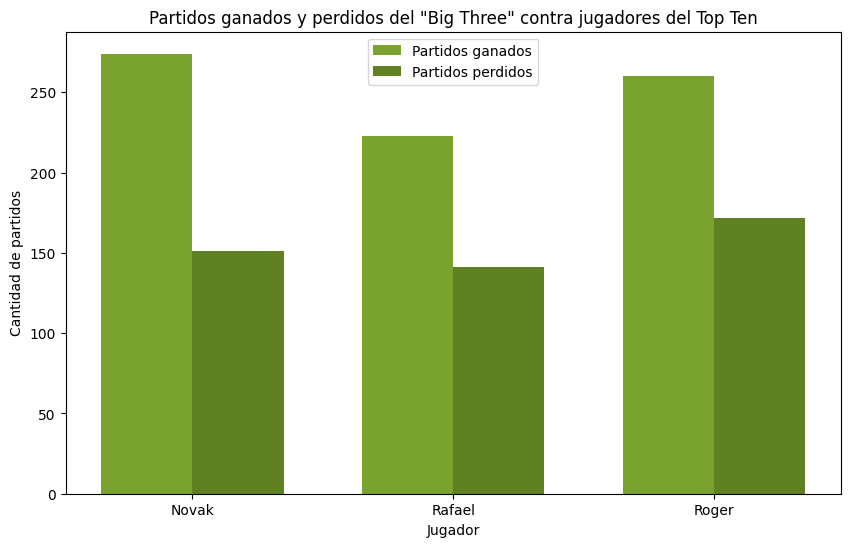

In [ ]:
players = ['Novak', 'Rafael', 'Roger']
wins = [novak_wins_top_ten.shape[0], rafael_wins_top_ten.shape[0], roger_wins_top_ten.shape[0]]
losses = [novak_losses_top_ten.shape[0], rafael_losses_top_ten.shape[0], roger_losses_top_ten.shape[0]]

x = np.arange(len(players))

width = 0.35 # ancho de las barras
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, wins, width, label='Partidos ganados', color='#7AA22E')
bars2 = ax.bar(x + width/2, losses, width, label='Partidos perdidos', color='#5F8121')

ax.set_xlabel('Jugador')
ax.set_ylabel('Cantidad de partidos')
ax.set_title('Partidos ganados y perdidos del "Big Three" contra jugadores del Top Ten')
ax.set_xticks(x)
ax.set_xticklabels(players)
ax.legend()
plt.show()

## Análisis de Aces en todos sus partidos según el tipo de superficie

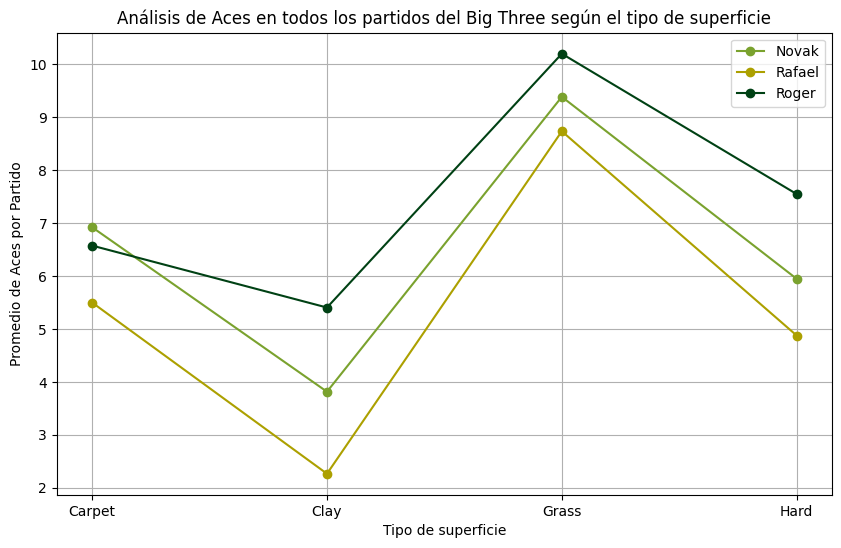

In [ ]:
novak_surface_aces = big_three_matches[(big_three_matches['winner_name'] == 'Novak Djokovic') | (big_three_matches['loser_name'] == 'Novak Djokovic') ].groupby('surface')['w_ace'].mean()
rafael_surface_aces = big_three_matches[(big_three_matches['winner_name'] == 'Rafael Nadal') | (big_three_matches['loser_name'] == 'Rafael Nadal')].groupby('surface')['w_ace'].mean()
roger_surface_aces = big_three_matches[(big_three_matches['winner_name'] == 'Roger Federer') | (big_three_matches['loser_name'] == 'Roger Federer')].groupby('surface')['w_ace'].mean()

plt.figure(figsize=(10, 6))

# Novak
plt.plot(novak_surface_aces.index, novak_surface_aces, label='Novak', marker='o', color='#7AA22E')

# Rafael
plt.plot(rafael_surface_aces.index, rafael_surface_aces, label='Rafael', marker='o', color='#aca000')

# Roger
plt.plot(roger_surface_aces.index, roger_surface_aces, label='Roger', marker='o', color='#004114')

plt.xlabel('Tipo de superficie')
plt.ylabel('Promedio de Aces por Partido')
plt.title('Análisis de Aces en todos los partidos del Big Three según el tipo de superficie')
plt.legend()
plt.grid(True)
plt.show()


## Análisis comparativo de puntos ganados en el primer servicio y el segundo servicio a través de los 2001-2020

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def plot_year(year):
    colors = {'Novak Djokovic': '#7AA22E', 'Rafael Nadal': '#aca000', 'Roger Federer': '#004114'}

    for player_name in ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer']:
        BM1 = (big_three_matches.year == year)
        BM2 = (big_three_matches.winner_name == player_name) | (big_three_matches.loser_name == player_name)
        BM = BM1 & BM2
        X = big_three_matches[BM].w_1stWon
        Y = big_three_matches[BM].w_2ndWon
        plt.scatter(X, Y, marker='o', color=colors[player_name], label=player_name)

    plt.xlabel('Puntos ganados en el primer servicio')
    plt.ylabel('Puntos ganados en el segundo servicio')
    plt.title(f'Análisis comparativo de puntos ganados en el primer y segundo servicio en el año {year}')
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_year, year=widgets.IntSlider(min=2000, max=2020, step=1, value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2020, min=2000), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

## Analisis comparativo break points salvados segun superficie

In [ ]:
novak_matches = big_three_matches[(big_three_matches['winner_name'] == 'Novak Djokovic') | (big_three_matches['loser_name'] == 'Novak Djokovic')]
roger_matches = big_three_matches[(big_three_matches['winner_name'] == 'Roger Federer') | (big_three_matches['loser_name'] == 'Roger Federer')]
rafael_matches = big_three_matches[(big_three_matches['winner_name'] == 'Rafael Nadal') | (big_three_matches['loser_name'] == 'Rafael Nadal')]

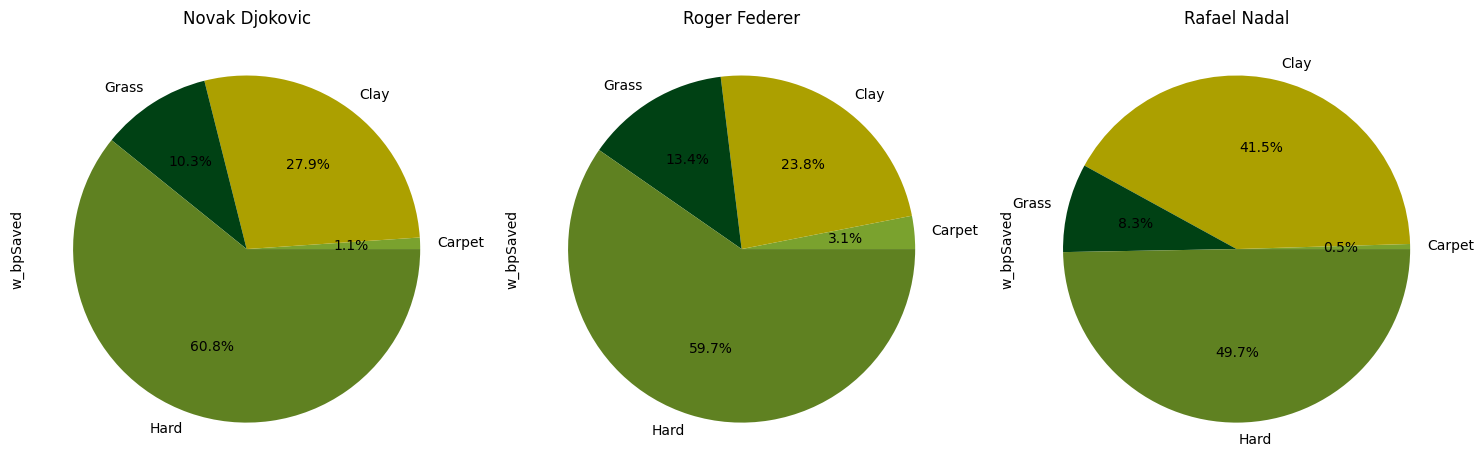

In [ ]:
novak_breakpoints = novak_matches.groupby('surface')['w_bpSaved'].sum()
roger_breakpoints = roger_matches.groupby('surface')['w_bpSaved'].sum()
rafael_breakpoints = rafael_matches.groupby('surface')['w_bpSaved'].sum()

novak_percentages = novak_breakpoints / novak_breakpoints.sum()*100
roger_percentages = roger_breakpoints / roger_breakpoints.sum()*100
rafael_percentages = rafael_breakpoints / rafael_breakpoints.sum()*100

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

novak_percentages.plot(kind='pie', autopct='%1.1f%%', ax=axs[0], colors=['#7AA22E', '#aca000', '#004114', '#5F8121'])
axs[0].set_title('Novak Djokovic')

roger_percentages.plot(kind='pie', autopct='%1.1f%%', ax=axs[1], colors=['#7AA22E', '#aca000', '#004114', '#5F8121'])
axs[1].set_title('Roger Federer')

rafael_percentages.plot(kind='pie', autopct='%1.1f%%', ax=axs[2],colors=['#7AA22E', '#aca000', '#004114', '#5F8121'])
axs[2].set_title('Rafael Nadal')

plt.tight_layout()
plt.show()

# Codificacion de Datos Categóricos

In [ ]:
# copia del dataframe para no afectar el original
big_three = big_three_matches.copy()
big_three.head(3)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ioc,winner_age,loser_name,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
1460,2000-301,Auckland,Hard,A,20000110,Juan Carlos Ferrero,R,ESP,19,Roger Federer,...,70,43,29,14,10,6,8,45,61,2000
1461,2000-306,St. Poelten,Clay,A,20000522,Markus Hantschk,R,GER,22,Roger Federer,...,64,36,19,10,8,6,11,94,54,2000
1462,2000-314,Gstaad,Clay,A,20000710,Alex Corretja,R,ESP,26,Roger Federer,...,116,63,43,26,15,7,10,10,39,2000


In [ ]:
categorical_data = big_three.select_dtypes(include=['object'])
encoded_data = pd.get_dummies(categorical_data)

num_data = big_three.select_dtypes(include=['int64', 'float64'])
combined_df = pd.concat([num_data, encoded_data], axis=1)
combined_df

,tourney_date,winner_age,loser_age,best_of,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,...,score_W/O,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
1460,20000110,19,18,3,5,1,53,28,26,15,...,False,False,False,False,False,False,True,False,False,False
1461,20000522,22,18,3,0,0,36,17,14,15,...,False,False,False,False,False,False,True,False,False,False
1462,20000710,26,18,3,8,7,96,50,39,25,...,False,False,False,False,False,False,True,False,False,False
1465,20001023,19,27,3,9,0,54,40,30,11,...,False,False,False,True,False,False,False,False,False,False
1467,20001023,26,19,5,10,3,151,79,54,43,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,20200824,33,32,3,14,7,103,58,40,19,...,False,False,False,False,False,False,False,False,False,True
353,20200824,33,29,3,2,4,55,31,26,15,...,False,False,False,False,False,True,False,False,False,False
354,20200824,33,30,3,8,7,64,35,25,15,...,False,False,False,False,False,False,True,False,False,False
350,20200824,33,29,3,2,5,76,39,29,18,...,False,False,True,False,False,False,False,False,False,False


# Estandarización de variables numéricas

In [ ]:
from sklearn.preprocessing import StandardScaler

num_data = big_three.select_dtypes(include=['int64', 'float64'])

# estandarización (z-score)
scaler = StandardScaler()
norm_data = scaler.fit_transform(num_data)

norm_df = pd.DataFrame(norm_data, columns=num_data.columns)
norm_df

,tourney_date,winner_age,loser_age,best_of,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
0,-2.091691,-1.422329,-1.923657,-0.682370,-0.198612,-0.480665,-0.802550,-1.102755,-0.825203,-0.082875,...,-0.379971,-0.331737,-0.229101,-0.039511,-0.526496,0.336103,-0.229187,1.254643,0.166553,-2.083407
1,-2.083685,-0.801381,-1.923657,-0.682370,-1.307148,-1.048777,-1.401871,-1.682585,-1.715049,-0.082875,...,-0.586798,-0.691380,-0.918729,-0.616510,-1.006928,0.336103,0.511543,2.990210,0.076476,-2.083407
2,-2.080032,0.026550,-1.923657,-0.682370,0.466510,2.928008,0.713378,0.056905,0.138796,1.484078,...,1.205710,0.695813,0.736377,1.691487,0.674584,0.644918,0.264633,0.014952,-0.116548,-2.083407
3,-2.073950,-1.422329,0.254000,-0.682370,0.688218,-1.048777,-0.767296,-0.470213,-0.528588,-0.709656,...,-0.448913,-0.691380,-0.435989,0.537488,-0.526496,-0.590342,-0.969916,0.865026,1.762215,-2.083407
4,-2.073950,0.026550,-1.681695,1.465481,0.909925,0.655559,2.652356,1.585548,1.251103,4.304593,...,1.929608,1.415099,1.770817,2.412736,2.356096,0.027288,0.264633,-0.126727,-0.180889,-2.083407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,1.808605,1.475429,1.463810,-0.682370,1.796755,2.928008,0.960157,0.478600,0.212950,0.543906,...,0.998882,1.209589,0.805339,0.104739,0.914800,0.953733,1.252273,-0.303826,-0.463990,1.803028
3855,1.808605,1.475429,0.737924,-0.682370,-0.863734,1.223672,-0.732042,-0.944619,-0.825203,-0.082875,...,-0.276557,-0.383115,-0.022213,-0.616510,-0.766712,0.336103,0.017723,-0.303826,0.089344,1.803028
3856,1.808605,1.475429,0.979886,-0.682370,0.466510,2.928008,-0.414755,-0.733772,-0.899357,-0.082875,...,-0.379971,-0.485870,-0.504952,-0.328010,-0.286280,-0.590342,-0.476097,-0.303826,0.308104,1.803028
3857,1.808605,1.475429,0.737924,-0.682370,-0.863734,1.791784,0.008295,-0.522925,-0.602742,0.387211,...,-0.345499,-0.177605,0.184675,-0.616510,0.194152,-0.899156,-0.969916,-0.303826,-0.232362,1.803028


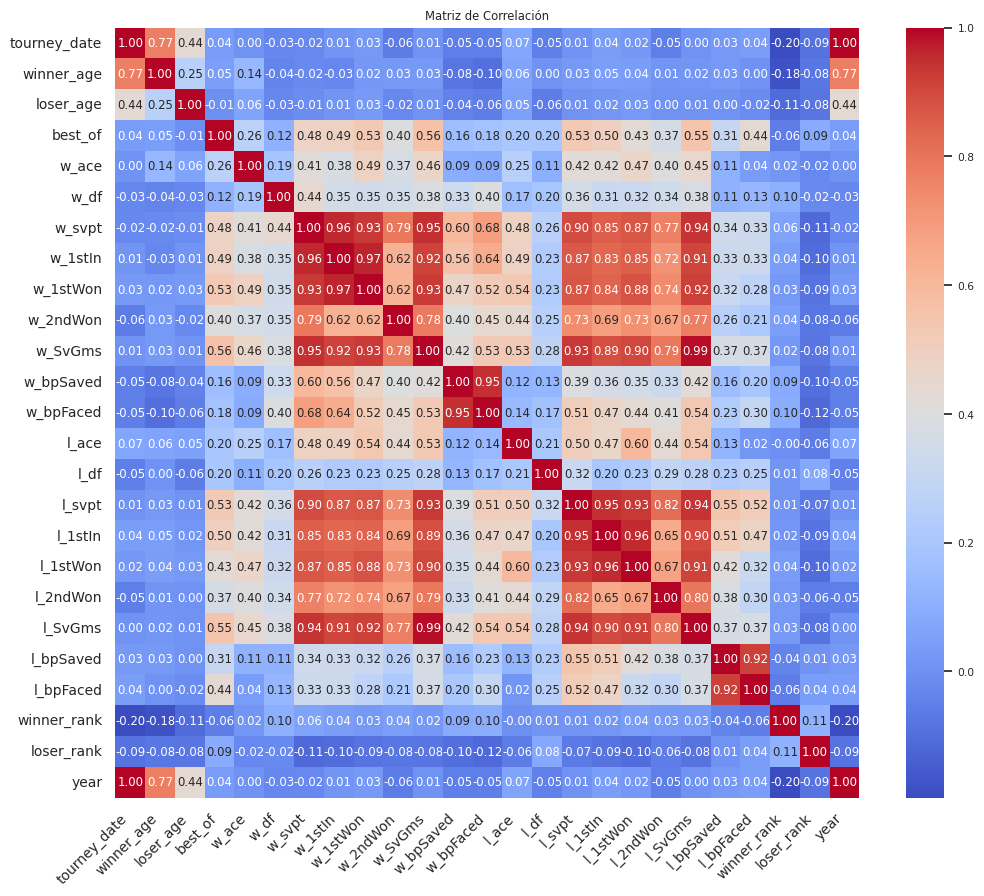

In [ ]:
# Heatmap
sns.set(font_scale=0.7)

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(norm_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Matriz de Correlación')
plt.show()